# Investigate Country Wealth according to World Bank regions

Assumptions: "can present a challenge because not every country does a good job of estimating GDP,"
source: https://www.npr.org/sections/goatsandsoda/2015/01/04/372684438/if-you-shouldnt-call-it-the-third-world-what-should-you-call-it#:~:text=The%20First%20World%20consisted%20of,assigned%20to%20the%20Third%20World.

## Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

mpl.style.use('ggplot')
%matplotlib inline

In [ ]:
### Remove scientific notation
pd.set_option('display.float_format', lambda x: '%1.0f' % x)

In [104]:
### Read Total GDP by PPP adjusted for inflation
gdp = pd.read_csv("data_income/total_gdp_ppp.csv")
gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,2.890000e+10,3.240000e+10,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
1,Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,...,2.110000e+10,2.230000e+10,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10
2,Algeria,3.810000e+09,3.820000e+09,3.830000e+09,3.850000e+09,3.860000e+09,3.870000e+09,3.890000e+09,3.900000e+09,3.920000e+09,...,3.720000e+11,3.920000e+11,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11,4.540000e+11,4.650000e+11,4.790000e+11
3,Andorra,3.340000e+06,3.350000e+06,3.360000e+06,3.360000e+06,3.370000e+06,3.370000e+06,3.380000e+06,3.380000e+06,3.390000e+06,...,2.820000e+09,3.040000e+09,3.190000e+09,3.190000e+09,3.060000e+09,2.900000e+09,2.810000e+09,2.730000e+09,NaN,NaN
4,Angola,1.020000e+09,1.020000e+09,1.030000e+09,1.030000e+09,1.040000e+09,1.040000e+09,1.050000e+09,1.050000e+09,1.050000e+09,...,6.310000e+10,7.610000e+10,9.020000e+10,1.110000e+11,1.270000e+11,1.300000e+11,1.340000e+11,1.390000e+11,1.460000e+11,1.520000e+11


In [15]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 215 entries, country to 2013
dtypes: float64(214), object(1)
memory usage: 326.0+ KB


### Value Readability

In [4]:
# Divide by 1 million, maybe it should be 1 billion
years = gdp.iloc[:,1:].apply(lambda x: if float64(x): x / 1000000.00)

In [16]:
years

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.0,...,28900.0,32400.0,33900.0,38500.0,39500.0,47500.0,51300.0,54900.0,63000.0,65800.0
1,326.00,327.00,328.00,330.00,331.00,332.00,334.00,335.00,337.00,338.0,...,21100.0,22300.0,23500.0,24900.0,26700.0,27600.0,28500.0,29300.0,30100.0,30700.0
2,3810.00,3820.00,3830.00,3850.00,3860.00,3870.00,3890.00,3900.00,3920.00,3930.0,...,372000.0,392000.0,399000.0,413000.0,421000.0,428000.0,443000.0,454000.0,465000.0,479000.0
3,3.34,3.35,3.36,3.36,3.37,3.37,3.38,3.38,3.39,3.4,...,2820.0,3040.0,3190.0,3190.0,3060.0,2900.0,2810.0,2730.0,NaN,NaN
4,1020.00,1020.00,1030.00,1030.00,1040.00,1040.00,1050.00,1050.00,1050.00,1060.0,...,63100.0,76100.0,90200.0,111000.0,127000.0,130000.0,134000.0,139000.0,146000.0,152000.0
5,28.60,28.60,28.60,28.60,28.60,28.60,28.60,28.60,28.60,28.6,...,1680.0,1750.0,1980.0,2110.0,2150.0,1920.0,1770.0,1740.0,1800.0,1830.0
6,507.00,507.00,507.00,507.00,507.00,507.00,507.00,507.00,507.00,507.0,...,427000.0,466000.0,504000.0,546000.0,582000.0,585000.0,637000.0,692000.0,703000.0,731000.0
7,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.0,...,14900.0,17100.0,19400.0,22000.0,23500.0,20000.0,20300.0,21100.0,22700.0,23400.0
8,278.00,278.00,278.00,278.00,278.00,278.00,278.00,277.00,277.00,277.0,...,761000.0,789000.0,813000.0,852000.0,874000.0,889000.0,916000.0,940000.0,970000.0,994000.0
9,5380.00,5420.00,5450.00,5490.00,5520.00,5560.00,5590.00,5630.00,5660.00,5700.0,...,321000.0,329000.0,341000.0,354000.0,358000.0,345000.0,352000.0,361000.0,363000.0,364000.0


In [7]:
# get countries to add them back to divided dataframe
countries = gdp.iloc[:,0]
countries

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
189      Venezuela
190        Vietnam
191          Yemen
192         Zambia
193       Zimbabwe
Name: country, Length: 194, dtype: object

In [19]:
# add countries back to dataframe - it adds it to the end of the column list :(
gdp5 = years.merge(countries, left_index=True, right_index=True)
gdp5

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,country
0,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.0,...,32400.0,33900.0,38500.0,39500.0,47500.0,51300.0,54900.0,63000.0,65800.0,Afghanistan
1,326.00,327.00,328.00,330.00,331.00,332.00,334.00,335.00,337.00,338.0,...,22300.0,23500.0,24900.0,26700.0,27600.0,28500.0,29300.0,30100.0,30700.0,Albania
2,3810.00,3820.00,3830.00,3850.00,3860.00,3870.00,3890.00,3900.00,3920.00,3930.0,...,392000.0,399000.0,413000.0,421000.0,428000.0,443000.0,454000.0,465000.0,479000.0,Algeria
3,3.34,3.35,3.36,3.36,3.37,3.37,3.38,3.38,3.39,3.4,...,3040.0,3190.0,3190.0,3060.0,2900.0,2810.0,2730.0,NaN,NaN,Andorra
4,1020.00,1020.00,1030.00,1030.00,1040.00,1040.00,1050.00,1050.00,1050.00,1060.0,...,76100.0,90200.0,111000.0,127000.0,130000.0,134000.0,139000.0,146000.0,152000.0,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,479.00,479.00,479.00,479.00,479.00,479.00,479.00,479.00,479.00,479.0,...,397000.0,438000.0,477000.0,502000.0,486000.0,479000.0,499000.0,527000.0,532000.0,Venezuela
190,4800.00,4800.00,4800.00,4800.00,4800.00,4800.00,4800.00,4800.00,4800.00,4800.0,...,284000.0,307000.0,332000.0,353000.0,371000.0,396000.0,419000.0,441000.0,465000.0,Vietnam
191,3340.00,3340.00,3340.00,3340.00,3340.00,3340.00,3340.00,3340.00,3340.00,3340.0,...,91300.0,94200.0,97400.0,101000.0,105000.0,113000.0,101000.0,104000.0,109000.0,Yemen
192,422.00,423.00,424.00,425.00,426.00,427.00,428.00,429.00,430.00,431.0,...,26800.0,28400.0,30200.0,32000.0,34000.0,36400.0,38800.0,41500.0,44000.0,Zambia


In [97]:
# get countries dataframe to have ability to divide world into regions or income groups
country_df = pd.read_csv("country_regions.csv")
country_df.rename(columns={'name':'country'}, inplace=True)
country_df.head()

,geo,country,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income,NaN
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income,NaN
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28/7/1993,Europe & Central Asia,High income,NaN
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income,NaN


### Show number of countries per World bank group

In [22]:
country_df.groupby("World bank, 4 income groups 2017")[['country']].count()

,country
"World bank, 4 income groups 2017",
High income,58
Low income,31
Lower middle income,52
Upper middle income,55


In [105]:
# not sure what you're trying to do here
sorted_country = country_df.sort_values(by=['World bank, 4 income groups 2017','name'])
sorted_country.head()

KeyError: 'name'

## Merge country data with GDP data to categorize countries into Regions/Groups

In [23]:
# merge countries dataframe with GDP info to have ability to divide world into regions or income groups
gdp6 = pd.merge(country_df,gdp5,on='country')

In [106]:
gdp6['2017 income groups'].value_counts()

High income            56
Upper middle income    54
Lower middle income    52
Low income             31
Name: 2017 income groups, dtype: int64

In [25]:
gdp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Columns: 226 entries, geo to 2013
dtypes: float64(217), object(9)
memory usage: 342.3+ KB


In [ ]:
# make easier to write column name
gdp6.rename(columns={'World bank, 4 income groups 2017':'2017 income groups'}, inplace=True)

In [159]:
gdp6.drop(columns={"geo","four_regions","eight_regions","six_regions","members_oecd_g77","Latitude","Longitude"}, inplace=True)

In [161]:
gdp6.drop(columns={"UN member since","World bank region","World bank, 3 income groups 2017"}, inplace=True)

In [162]:
gdp6.head(1)

,country,2017 income groups,1800,1801,1802,1803,1804,1805,1806,1807,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Low income,2080.0,2080.0,2080.0,2080.0,2080.0,2080.0,2080.0,2080.0,...,28900.0,32400.0,33900.0,38500.0,39500.0,47500.0,51300.0,54900.0,63000.0,65800.0


### Missing Data

In [107]:
pd.isnull(gdp6)

,geo,country,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Working on vectorizing a summary of null percentages per 'income_group' or 'country'

In [163]:
by_income_groups = gdp6.groupby('2017 income groups')

In [145]:
for group, frame in by_income_groups:
    print(f"First entries in {group}")
    print("-------------------------------")
    print(frame.iloc[0], end='\n\n')

First entries in High income
-------------------------------
geo                              and
country                      Andorra
four_regions                  europe
eight_regions            europe_west
six_regions      europe_central_asia
                        ...         
2009                            2900
2010                            2810
2011                            2730
2012                             NaN
2013                             NaN
Name: 3, Length: 226, dtype: object

First entries in Low income
-------------------------------
geo                      afg
country          Afghanistan
four_regions            asia
eight_regions      asia_west
six_regions       south_asia
                    ...     
2009                   47500
2010                   51300
2011                   54900
2012                   63000
2013                   65800
Name: 0, Length: 226, dtype: object

First entries in Lower middle income
-------------------------------
geo       

In [164]:
high_income = by_income_groups.get_group("High income")

In [188]:
#.isnull().value_counts()
frame.iloc[25,12:229]

1800      659
1801      659
1802      659
1803      659
1804      659
        ...  
2009    23400
2010    23000
2011    23300
2012    23200
2013    23300
Name: 82, Length: 214, dtype: object

In [143]:
frame.iloc[1,12:229]

1800      3810
1801      3820
1802      3830
1803      3850
1804      3860
         ...  
2009    428000
2010    443000
2011    454000
2012    465000
2013    479000
Name: 2, Length: 214, dtype: object

In [174]:
high_income.head(3)

,country,2017 income groups,1800,1801,1802,1803,1804,1805,1806,1807,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
3,Andorra,High income,3.34,3.35,3.36,3.36,3.37,3.37,3.38,3.38,...,2820.0,3040.0,3190.0,3190.0,3060.0,2900.0,2810.0,2730.0,NaN,NaN
5,Antigua and Barbuda,High income,28.60,28.60,28.60,28.60,28.60,28.60,28.60,28.60,...,1680.0,1750.0,1980.0,2110.0,2150.0,1920.0,1770.0,1740.0,1800.0,1830.0
8,Australia,High income,278.00,278.00,278.00,278.00,278.00,278.00,278.00,277.00,...,761000.0,789000.0,813000.0,852000.0,874000.0,889000.0,916000.0,940000.0,970000.0,994000.0


In [166]:
high_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 3 to 183
Columns: 216 entries, country to 2013
dtypes: float64(214), object(2)
memory usage: 94.9+ KB


In [177]:
## This doesn't quite work because the index was preserved from the grouping of income groups.
## Reindex or reset_index to utilize this method

num_rows = 0
null_sum = 0
null_percent = 0

for i in high_income.index:
    null_sum = high_income.iloc[i-1,:].isnull().sum()
    if null_sum:
        null_percent = null_sum / 214 * 100
    if null_percent:
        print(f"Country null %: {high_income.iloc[i].country}: {null_percent}")
    else:
        print(f"Country null %: {high_income.iloc[i].country}: {null_sum}")    

Country null %: Austria: 0
Country null %: Bahrain: 0
Country null %: Brunei: 0
Country null %: Canada: 0
Country null %: Cyprus: 0
Country null %: Czech Republic: 0
Country null %: Estonia: 0
Country null %: France: 0
Country null %: Japan: 0
Country null %: Luxembourg: 0
Country null %: New Zealand: 0
Country null %: Seychelles: 0
Country null %: Singapore: 0
Country null %: Slovak Republic: 0
Country null %: Uruguay: 0


IndexError: single positional indexer is out-of-bounds

## Remove all rows with null values and compare remaining? Hmmmm...

In [192]:
years=range(1900,2005,5)

In [194]:
gdp6.groupby("2017 income groups")[list[years]].mean()

TypeError: 'type' object is not subscriptable

## Data Analysis

In [26]:
gdp6.describe()

,Latitude,Longitude,"World bank, 3 income groups 2017",1800,1801,1802,1803,1804,1805,1806,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,193.000000,193.000000,0.0,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,1.930000e+02,1.930000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.870000e+02,1.830000e+02
mean,18.872044,22.030936,NaN,4996.501354,5020.919323,5059.761302,5081.805781,5115.606042,5151.373490,5180.455521,...,3.676763e+05,3.843923e+05,4.080827e+05,4.299615e+05,4.389190e+05,4.357722e+05,4.573267e+05,4.731392e+05,5.023322e+05,5.264768e+05
std,23.946232,66.862571,NaN,23409.570520,23547.663651,23761.025203,23898.301403,24071.474993,24280.808915,24425.642348,...,1.299222e+06,1.354385e+06,1.427714e+06,1.496884e+06,1.506185e+06,1.505891e+06,1.580129e+06,1.635821e+06,1.735693e+06,1.825271e+06
min,-42.000000,-175.000000,NaN,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,...,4.640000e+01,4.830000e+01,5.590000e+01,4.990000e+01,9.750000e+01,7.980000e+01,7.980000e+01,8.300000e+01,1.810000e+02,1.860000e+02
25%,4.000000,-6.000000,NaN,87.600000,87.600000,87.675000,87.675000,87.700000,87.775000,87.775000,...,8.010000e+03,8.470000e+03,1.035500e+04,1.050250e+04,1.160000e+04,1.152500e+04,1.177500e+04,1.217500e+04,1.525000e+04,1.565000e+04
50%,17.050000,21.000000,NaN,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,3.620000e+04,3.710000e+04,4.080000e+04,4.495000e+04,4.570000e+04,4.640000e+04,4.885000e+04,5.090000e+04,5.630000e+04,6.040000e+04
75%,39.760000,50.550000,NaN,1952.500000,1952.500000,1952.500000,1952.500000,1952.500000,1952.500000,1952.500000,...,2.130000e+05,2.350000e+05,2.527500e+05,2.690000e+05,2.812500e+05,2.752500e+05,2.847500e+05,2.900000e+05,2.995000e+05,3.360000e+05
max,65.000000,179.144780,NaN,287000.000000,289000.000000,292000.000000,294000.000000,296000.000000,299000.000000,301000.000000,...,1.440000e+07,1.480000e+07,1.520000e+07,1.550000e+07,1.540000e+07,1.490000e+07,1.530000e+07,1.560000e+07,1.610000e+07,1.640000e+07


### First useful attempt at data exploration
Look at basic statastics over entire dataset

* Are there any problems with the data?

In [29]:
gdp6.groupby('World bank, 4 income groups 2017')[['1800','1850','1900','1950','2000','2013']].describe()

1800                                    \
                                 count         mean           std    min   
World bank, 4 income groups 2017                                           
High income                       55.0  5283.515818  11070.505701   3.32   
Low income                        31.0   888.267742    924.667401  44.50   
Lower middle income               52.0  4465.429808  17218.607165   8.95   
Upper middle income               54.0  7574.004444  39335.085143   1.05   

                                                                   1850  \
                                     25%    50%     75%       max count   
World bank, 4 income groups 2017                                          
High income                        59.55  505.0  5185.0   49200.0  56.0   
Low income                        355.00  585.0   912.5    4190.0  31.0   
Lower middle income               171.50  583.0  1895.0  123000.0  52.0   
Upper middle income                59.60  368.0  1485.0  287000.0  54.0   

                                                ...      2000              \
                                          mean  ...       75%         max   
World bank, 4 income groups 2017                ...                         
High income                       10588.768393  ...  345000.0  13100000.0   
Low income                         1123.380645  ...   19150.0     43100.0   
Lower middle income                5546.555769  ...   73550.0   2710000.0   
Upper middle income               10384.455741  ...  293000.0   5580000.0   

                                  2013                                       \
                                 count           mean           std     min   
World bank, 4 income groups 2017                                              
High income                       52.0  878715.211538  2.372766e+06   311.0   
Low income                        30.0   25690.666667  2.682552e+04  1210.0   
Lower middle income               50.0  313138.300000  9.877093e+05   186.0   
Upper middle income               51.0  671067.078431  2.254248e+06   200.0   

                                                                           
                                      25%       50%       75%         max  
World bank, 4 income groups 2017                                           
High income                       48675.0  244000.0  533750.0  16400000.0  
Low income                         7190.0   16750.0   29375.0    116000.0  
Lower middle income               16175.0   45750.0  149250.0   6630000.0  
Upper middle income               15435.0   71500.0  495500.0  15700000.0  

[4 rows x 48 columns]

In [116]:
#'1955','1960','1965','1970','1975','1980','1985','1990','1995','2000','2005','2010','2013'
gdp6.groupby(['2017 income groups'], as_index=False)[['1900','1905','1910','1915','1920','1925','1930','1935','1940','1945','1950']].agg(["min","mean","max"])

1900                           1905                \
                       min          mean       max    min          mean   
2017 income groups                                                        
High income           6.49  35059.965893  505000.0   6.76  40096.831429   
Low income           91.00   1753.806452    5230.0  95.00   1848.354839   
Lower middle income  14.10   9315.438462  195000.0  14.30  10042.523077   
Upper middle income   1.83  15347.999074  319000.0   1.89  16559.272963   

                                1910                            1915  ...  \
                          max    min          mean       max     min  ...   
2017 income groups                                                    ...   
High income          632000.0   7.05  46328.052679  745000.0    8.14  ...   
Low income             5450.0  99.30   1950.106452    5770.0  104.00  ...   
Lower middle income  213000.0  14.60  11226.942308  236000.0   15.70  ...   
Upper middle income  314000.0   1.96  19220.378519  373000.0    2.17  ...   

                           2000    2005                               2010  \
                            max     min           mean         max     min   
2017 income groups                                                           
High income          13100000.0   256.0  730152.250000  14800000.0   279.0   
Low income              43100.0  1030.0   17048.387097     53800.0  1100.0   
Lower middle income   2710000.0   165.0  190649.692308   3750000.0   172.0   
Upper middle income   5580000.0    48.3  423275.822222   8690000.0    79.8   

                                                  2013                 \
                              mean         max     min           mean   
2017 income groups                                                      
High income          777478.196429  15300000.0   311.0  878715.211538   
Low income            22192.903226     88100.0  1210.0   25690.666667   
Lower middle income  261326.846154   5630000.0   186.0  313138.300000   
Upper middle income  565867.467925  12800000.0   200.0  671067.078431   

                                 
                            max  
2017 income groups               
High income          16400000.0  
Low income             116000.0  
Lower middle income   6630000.0  
Upper middle income  15700000.0  

[4 rows x 72 columns]

In [30]:
worldbank_means = gdp6.groupby('World bank, 4 income groups 2017')[['1800','1850','1900','1950','2000','2013']].mean()

In [31]:
worldbank_means

,1800,1850,1900,1950,2000,2013
"World bank, 4 income groups 2017",,,,,,
High income,5283.515818,10588.768393,35059.965893,127907.589286,648189.196429,878715.211538
Low income,888.267742,1123.380645,1753.806452,3767.580645,13679.225806,25690.666667
Lower middle income,4465.429808,5546.555769,9315.438462,20864.965385,143950.346154,313138.300000
Upper middle income,7574.004444,10384.455741,15347.999074,42872.488889,316934.490741,671067.078431


In [35]:
worldbank_means_trans = worldbank_means.transpose()
worldbank_means_trans

"World bank, 4 income groups 2017",High income,Low income,Lower middle income,Upper middle income
1800,5283.515818,888.267742,4465.429808,7574.004444
1850,10588.768393,1123.380645,5546.555769,10384.455741
1900,35059.965893,1753.806452,9315.438462,15347.999074
1950,127907.589286,3767.580645,20864.965385,42872.488889
2000,648189.196429,13679.225806,143950.346154,316934.490741
2013,878715.211538,25690.666667,313138.300000,671067.078431


In [36]:
worldbank_means_trans.reset_index()

"World bank, 4 income groups 2017",index,High income,Low income,Lower middle income,Upper middle income
0,1800,5283.515818,888.267742,4465.429808,7574.004444
1,1850,10588.768393,1123.380645,5546.555769,10384.455741
2,1900,35059.965893,1753.806452,9315.438462,15347.999074
3,1950,127907.589286,3767.580645,20864.965385,42872.488889
4,2000,648189.196429,13679.225806,143950.346154,316934.490741
5,2013,878715.211538,25690.666667,313138.300000,671067.078431


In [48]:
worldbank_means_trans

"World bank, 4 income groups 2017",High income,Low income,Lower middle income,Upper middle income
1800,5283.515818,888.267742,4465.429808,7574.004444
1850,10588.768393,1123.380645,5546.555769,10384.455741
1900,35059.965893,1753.806452,9315.438462,15347.999074
1950,127907.589286,3767.580645,20864.965385,42872.488889
2000,648189.196429,13679.225806,143950.346154,316934.490741
2013,878715.211538,25690.666667,313138.300000,671067.078431


In [51]:
world_gdp = worldbank_means_trans.rename(columns={'World bank, 4 income groups 2017':'year'})

In [55]:
world_gdp.index.names = ['year']

In [60]:
world_gdp = world_gdp.reset_index()

In [61]:
world_gdp

"World bank, 4 income groups 2017",year,High income,Low income,Lower middle income,Upper middle income
0,1800,5283.515818,888.267742,4465.429808,7574.004444
1,1850,10588.768393,1123.380645,5546.555769,10384.455741
2,1900,35059.965893,1753.806452,9315.438462,15347.999074
3,1950,127907.589286,3767.580645,20864.965385,42872.488889
4,2000,648189.196429,13679.225806,143950.346154,316934.490741
5,2013,878715.211538,25690.666667,313138.300000,671067.078431


KeyError: 'World bank, 4 income groups 2017'

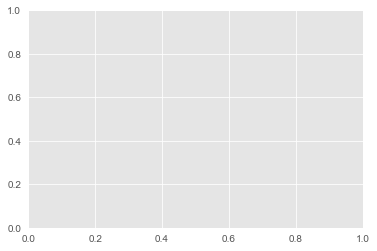

In [34]:
worldbank_means.plot(x='High income', y='World bank, 4 income groups 2017', kind="scatter");

## Visualizations on GDP data - Long Term

Text(0.5, 0, 'Years')

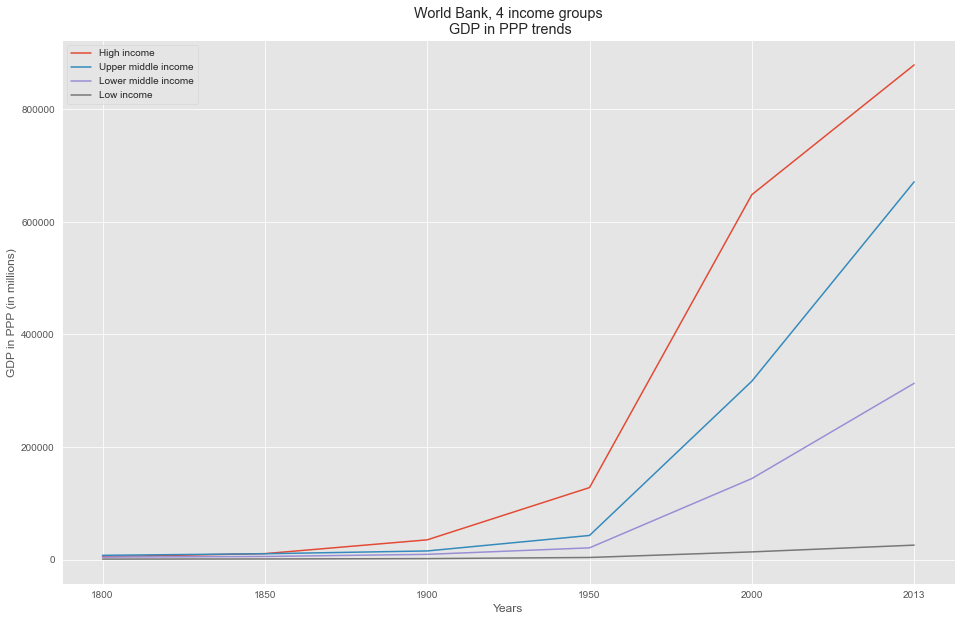

In [63]:
ax = plt.gca()

world_gdp.plot(x='year', y='High income', kind='line', figsize=(16,10), ax=ax)
world_gdp.plot(x='year', y='Upper middle income', kind='line', figsize=(16,10), ax=ax)
world_gdp.plot(x='year', y='Lower middle income', kind='line', figsize=(16,10), ax=ax)
world_gdp.plot(x='year', y='Low income', kind='line', figsize=(16,10), ax=ax)

plt.title("World Bank, 4 income groups\n GDP in PPP trends")
plt.ylabel("GDP in PPP (in millions)")
plt.xlabel("Years")


# GDP Data broken down by World Bank groups

# GDP Data - 1900s+

In [82]:
world_gdp2 = gdp6.groupby('World bank, 4 income groups 2017')[['1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000','2010']].mean()
world_gdp2

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
"World bank, 4 income groups 2017",,,,,,,,,,,,
High income,35059.965893,46328.052679,49510.853571,69092.044643,94526.101786,127907.589286,199213.250000,296999.017857,403453.678571,495651.017857,648189.196429,777478.196429
Low income,1753.806452,1950.106452,2276.612903,2656.225806,3317.387097,3767.580645,5632.225806,7783.290323,9579.096774,11523.612903,13679.225806,22192.903226
Lower middle income,9315.438462,11226.942308,11470.461538,15146.028846,18488.151923,20864.965385,31558.905769,47168.269231,71708.490385,102975.980769,143950.346154,261326.846154
Upper middle income,15347.999074,19220.378519,18350.133519,26766.843889,33536.499074,42872.488889,75296.459259,122705.337037,192902.940741,244515.157407,316934.490741,565867.467925


In [84]:
world_gdp2.index

Index(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'],
      dtype='object', name='World bank, 4 income groups 2017')

In [85]:
world_gdp2.columns

Index(['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980',
       '1990', '2000', '2010'],
      dtype='object')

In [86]:
world_gdp2.index.name = None

In [87]:
world_gdp2

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
High income,35059.965893,46328.052679,49510.853571,69092.044643,94526.101786,127907.589286,199213.250000,296999.017857,403453.678571,495651.017857,648189.196429,777478.196429
Low income,1753.806452,1950.106452,2276.612903,2656.225806,3317.387097,3767.580645,5632.225806,7783.290323,9579.096774,11523.612903,13679.225806,22192.903226
Lower middle income,9315.438462,11226.942308,11470.461538,15146.028846,18488.151923,20864.965385,31558.905769,47168.269231,71708.490385,102975.980769,143950.346154,261326.846154
Upper middle income,15347.999074,19220.378519,18350.133519,26766.843889,33536.499074,42872.488889,75296.459259,122705.337037,192902.940741,244515.157407,316934.490741,565867.467925


In [88]:
world_gdp3 = world_gdp2.transpose()
world_gdp3

,High income,Low income,Lower middle income,Upper middle income
1900,35059.965893,1753.806452,9315.438462,15347.999074
1910,46328.052679,1950.106452,11226.942308,19220.378519
1920,49510.853571,2276.612903,11470.461538,18350.133519
1930,69092.044643,2656.225806,15146.028846,26766.843889
1940,94526.101786,3317.387097,18488.151923,33536.499074
1950,127907.589286,3767.580645,20864.965385,42872.488889
1960,199213.250000,5632.225806,31558.905769,75296.459259
1970,296999.017857,7783.290323,47168.269231,122705.337037
1980,403453.678571,9579.096774,71708.490385,192902.940741
1990,495651.017857,11523.612903,102975.980769,244515.157407


In [92]:
world_gdp3 = world_gdp3.reset_index()
world_gdp3

,index,High income,Low income,Lower middle income,Upper middle income
0,1900,35059.965893,1753.806452,9315.438462,15347.999074
1,1910,46328.052679,1950.106452,11226.942308,19220.378519
2,1920,49510.853571,2276.612903,11470.461538,18350.133519
3,1930,69092.044643,2656.225806,15146.028846,26766.843889
4,1940,94526.101786,3317.387097,18488.151923,33536.499074
5,1950,127907.589286,3767.580645,20864.965385,42872.488889
6,1960,199213.250000,5632.225806,31558.905769,75296.459259
7,1970,296999.017857,7783.290323,47168.269231,122705.337037
8,1980,403453.678571,9579.096774,71708.490385,192902.940741
9,1990,495651.017857,11523.612903,102975.980769,244515.157407


In [93]:
world_gdp4 = world_gdp3.rename(columns={'index':'year'})
world_gdp4

,year,High income,Low income,Lower middle income,Upper middle income
0,1900,35059.965893,1753.806452,9315.438462,15347.999074
1,1910,46328.052679,1950.106452,11226.942308,19220.378519
2,1920,49510.853571,2276.612903,11470.461538,18350.133519
3,1930,69092.044643,2656.225806,15146.028846,26766.843889
4,1940,94526.101786,3317.387097,18488.151923,33536.499074
5,1950,127907.589286,3767.580645,20864.965385,42872.488889
6,1960,199213.250000,5632.225806,31558.905769,75296.459259
7,1970,296999.017857,7783.290323,47168.269231,122705.337037
8,1980,403453.678571,9579.096774,71708.490385,192902.940741
9,1990,495651.017857,11523.612903,102975.980769,244515.157407


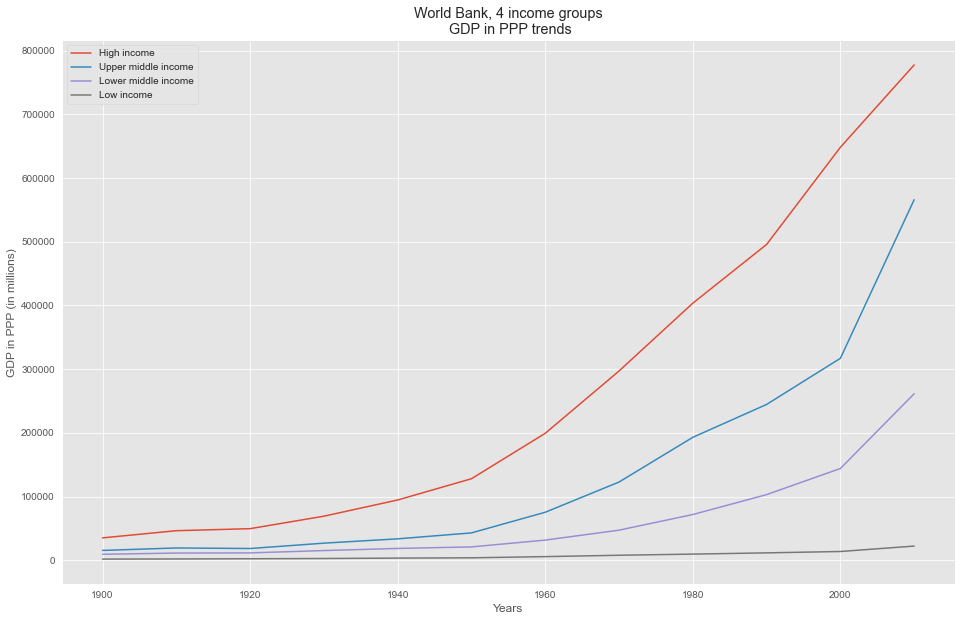

In [94]:
ax = plt.gca()

world_gdp4.plot(x='year', y='High income', kind='line', figsize=(16,10), ax=ax)
world_gdp4.plot(x='year', y='Upper middle income', kind='line', figsize=(16,10), ax=ax)
world_gdp4.plot(x='year', y='Lower middle income', kind='line', figsize=(16,10), ax=ax)
world_gdp4.plot(x='year', y='Low income', kind='line', figsize=(16,10), ax=ax)

plt.title("World Bank, 4 income groups\n GDP in PPP trends")
plt.ylabel("GDP in PPP (in millions)")
plt.xlabel("Years")

plt.show();